# Exploratory data analysis

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow
import os
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
df = pd.read_excel('Product_Sheet.xlsx')

In [3]:
df.sample(3)

,catalog_name,itm_nbr,vendor_number,model_id,prd_des_txt,prd_price,brn_nme,low_mer_div_txt,itm_typ_txt,prd_sts_txt,product_name,last_breadcrumb,link_url,prd_image
2031,Trowels,1043141,1190,SP10BD-L,10-in Texturing And Polishing Trowel,33.98,Marshalltown,Tools,Regular Item,ANY,Marshalltown 10-in Texturing And Polishing Trowel,Masonry Tools,https://www.lowes.com/pd/Marshalltown-10-in-Te...,https://images.lowes.com/product/converted/035...
481,Oscillating Tool Kits,496202,30054,1400-02,2-Amp Oscillating Multi-Tool Kit,79.97,SKIL,Tools,Regular Item,LOCALONLY,SKIL 2-Amp Oscillating Multi-Tool Kit,Rotary Tools & Oscillating Tools,https://www.lowes.com/pd/SKIL-2-Amp-Oscillatin...,https://images.lowes.com/product/converted/039...
4099,Screw Extractors & Sets,299377,103643,VMG01,Grab It #1,7.98,GRABIT,Tools,Regular Item,ANY,GRABIT Grab It #1,Drill Bits,https://www.lowes.com/pd/GRABIT-Grab-It-1/1000...,https://images.lowes.com/product/converted/860...


In [4]:
df.columns

Index(['catalog_name', 'itm_nbr', 'vendor_number', 'model_id', 'prd_des_txt',
       'prd_price', 'brn_nme', 'low_mer_div_txt', 'itm_typ_txt', 'prd_sts_txt',
       'product_name', 'last_breadcrumb', 'link_url', 'prd_image'],
      dtype='object')

In [5]:
df.shape

(7524, 14)

In [6]:
df.catalog_name.value_counts()

Sockets & Socket Sets          525
Masonry Drill Bits             195
Reciprocating Saw Blades       192
Screwdriver Bits               191
Hole Saws & Kits               180
                              ... 
Paint Scrapers                   1
Metric Thread Gauges             1
Power Strips                     1
Surface Lubricants & Grease      1
Heating & Cooling Apparel        1
Name: catalog_name, Length: 342, dtype: int64

In [7]:
catalog = df.catalog_name.value_counts().sort_values()

In [8]:
print('Number of Items in catalog : ', len(catalog.keys()))

Number of Items in catalog :  342


* overall distribution of items

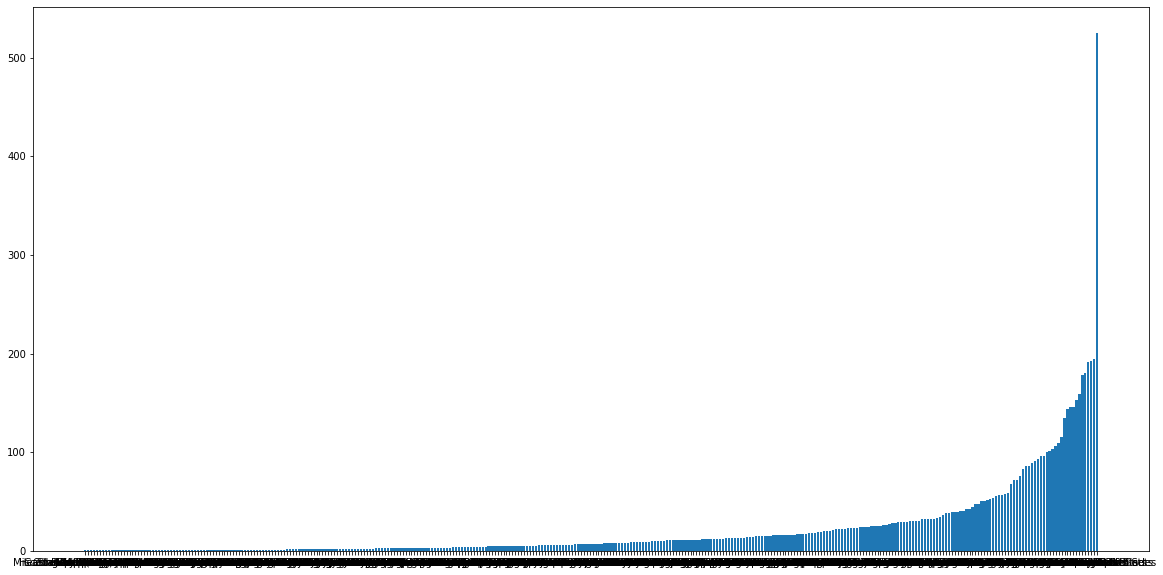

In [9]:
_ = plt.figure(figsize=(20,10))
_ = plt.bar(catalog.keys(), catalog.values)

* top 10 and last 10 items by count

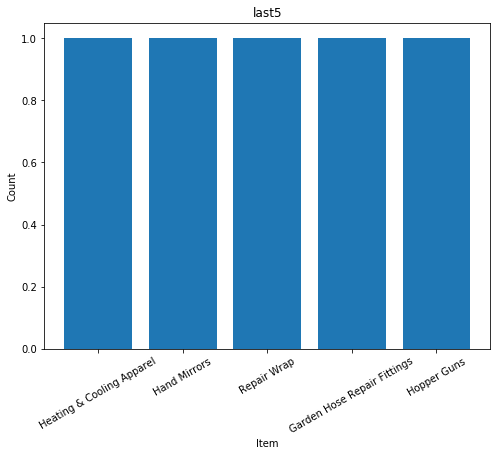

In [10]:
_ = plt.figure(figsize=(8,6))
last5 = catalog.iloc[:5]
_ = plt.bar(last5.keys(), last5.values)
_ = plt.title('last5')
_ = plt.xlabel('Item')
_ = plt.ylabel('Count')
_ = plt.xticks(rotation=30)

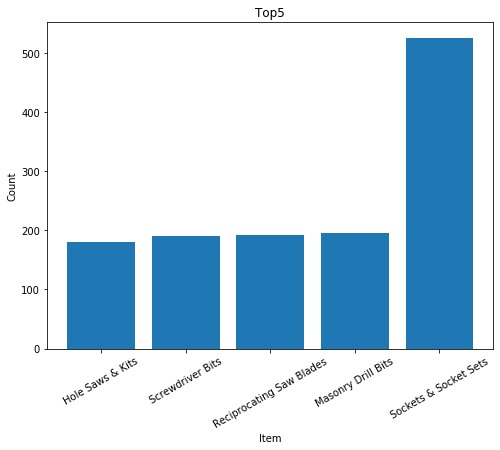

In [11]:
_ = plt.figure(figsize=(8,6))
top5 = catalog.iloc[-5:]
_ = plt.bar(top5.keys(), top5.values)
_ = plt.title('Top5')
_ = plt.xlabel('Item')
_ = plt.ylabel('Count')
_ = plt.xticks(rotation=30)

* Lets look at some of the images form top class.

In [12]:
df['fname'] = df['prd_image'].apply(lambda x: x.split('/')[-1])

In [23]:
def plot_products(cat_name, n=1):
    fig = plt.figure(figsize=(16,16))
    fig.suptitle(cat_name, fontsize=16)
    for i, f in enumerate(df[df.catalog_name == cat_name].fname.iloc[:n]):
        _ = plt.subplot(int(n+1/3),3,i+1)
        imshow(imread(os.path.join('data', f)))
    plt.show()

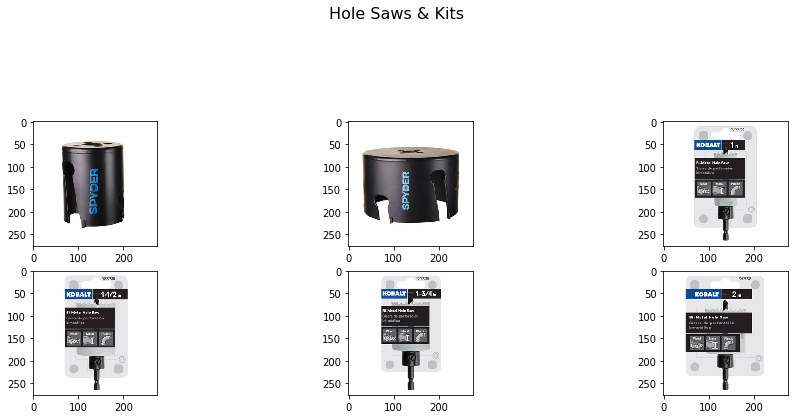

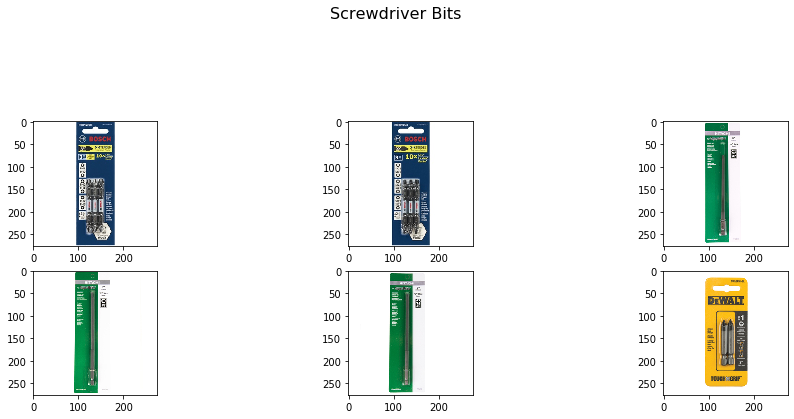

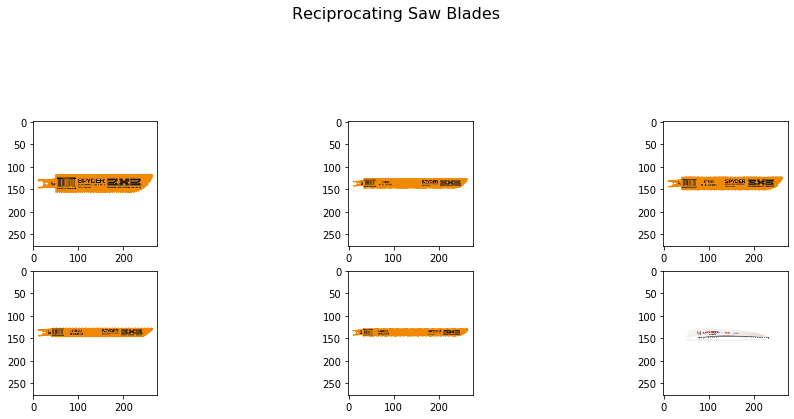

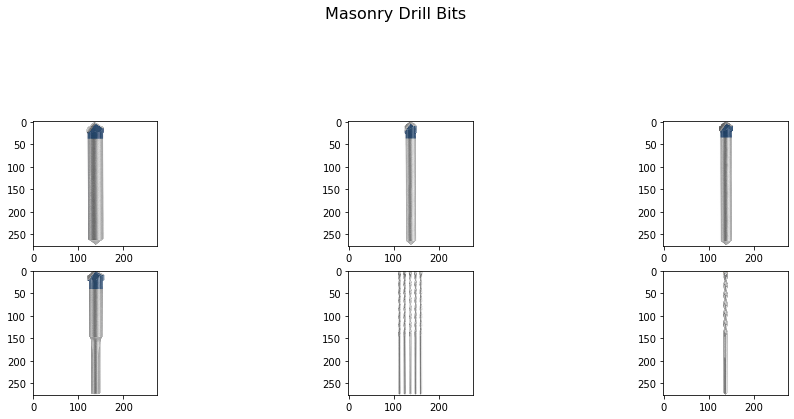

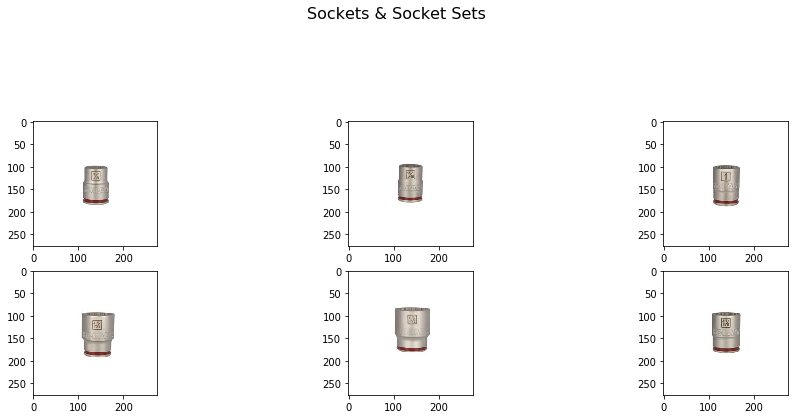

In [25]:
for cat_name in top5.keys():
    plot_products(cat_name, 6)

In [27]:
df.sample(3)

,catalog_name,itm_nbr,vendor_number,model_id,prd_des_txt,prd_price,brn_nme,low_mer_div_txt,itm_typ_txt,prd_sts_txt,product_name,last_breadcrumb,link_url,prd_image,fname
6438,Welding & Cutting Accessories,425004,47120,SGY-WELD16,Small Welding Magnet,8.58,Blue Hawk,Tools,Regular Item,ANY,Blue Hawk Small Welding Magnet,Welding Supplies & Accessories,https://www.lowes.com/pd/Blue-Hawk-Small-Weldi...,https://images.lowes.com/product/converted/879...,879686004172lg.jpg
4274,Squares,1303498,1099,T0108,Big 12&#174; Speed&#174; Square W/Plain Markin...,14.98,Swanson Tool Company,Tools,Regular Item,ANY,Swanson Tool Company Big 12&#174; Speed&#174; ...,Protractors & Squares,https://www.lowes.com/pd/Swanson-Tool-Company-...,https://images.lowes.com/product/converted/038...,038987001086lg.jpg
3228,Mechanics Tool Sets,1049244,70,CMMT12019,47-Piece Standard (SAE) and Metric Polished Ch...,59.98,CRAFTSMAN,Tools,Regular Item,ANY,CRAFTSMAN 47-Piece Standard (SAE) and Metric P...,Tool Sets,https://www.lowes.com/pd/CRAFTSMAN-47-Piece-St...,https://images.lowes.com/product/converted/885...,885911590020lg.jpg


* brand distribution

In [40]:
brands = df.brn_nme.value_counts()

In [42]:
brands

CRAFTSMAN              1245
Kobalt                 1234
DEWALT                  903
Bosch                   681
IRWIN                   523
                       ... 
C.H. Hanson               1
Gator Grip                1
Stanley FatMax            1
J. Terence Thompson       1
The StudBuddy             1
Name: brn_nme, Length: 159, dtype: int64

In [41]:
print("Total Brands: ", len(brands))

Total Brands:  159


* itm_typ_txt

In [43]:
df.itm_typ_txt.value_counts()

Regular Item    7524
Name: itm_typ_txt, dtype: int64

* product exloration

In [69]:
unique_products = df.groupby(['itm_nbr', 'model_id']).size()

In [71]:
duplicate_products = unique_products[unique_products > 1]

In [73]:
duplicate_products

itm_nbr  model_id
75686    DW3128P5    2
112207   85520       2
204419   91104       2
271869   85505       2
295963   295963      2
                    ..
1319087  33804       2
1319110  9166        2
1319112  1225        2
1339553  1L-50-2     2
1341441  4L-039-1    2
Length: 73, dtype: int64

In [76]:
print("There are {0} duplicate products based on item number and model id".format(duplicate_products.shape[0]))

There are 73 duplicate products based on item number and model id


* some of the example of these duplicate products

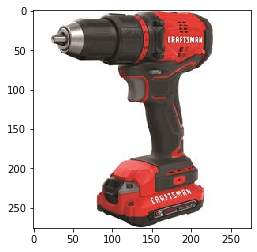

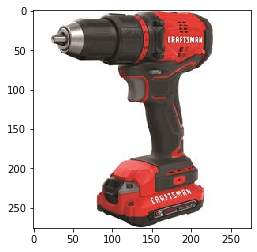

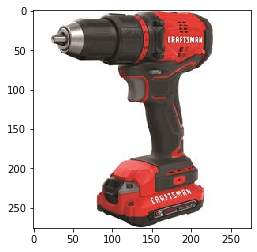

In [67]:
for f in df[df.itm_nbr==1045294 ].fname:
    _ = imshow(imread(os.path.join('data',f)))
    plt.show()

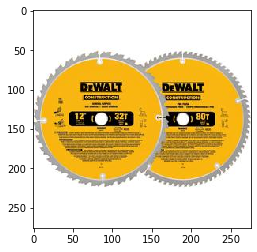

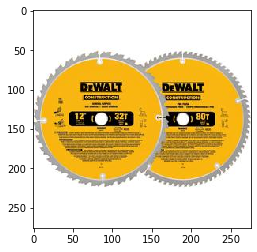

In [77]:
for f in df[df.itm_nbr==75686].fname:
    _ = imshow(imread(os.path.join('data',f)))
    plt.show()

### EDA results
* The products are distributed into many different categories based on catalog_name. Some of the categories are more frequent than the others.
* The data included total `159` different brands product.
* Each product is uniquly identified by `itm_nbr` and `model_id`. But we found few duplicate items having same `itm_nbr` and `model_id`.